In [1]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = []
for filename in glob.glob(os.path.expanduser("~/dsi/good-food-purchasing-nova-classification/test-results/try3/gpt-4.1-nano/*.csv")):
    results.append(pd.read_csv(filename, header=None, names=["index", "P1", "P2", "P3", "P4", "truth"]))

results = pd.concat(results).set_index("index").sort_index()
results

,P1,P2,P3,P4,truth
index,,,,,
0,1.640808e-05,3.065434e-05,1.329560e-01,8.669823e-01,4
1,9.987557e-01,4.302066e-04,8.037317e-04,0.000000e+00,3
2,9.999849e-01,6.348703e-09,0.000000e+00,0.000000e+00,1
3,8.095624e-06,6.223907e-01,3.774990e-01,7.680914e-05,4
4,2.626519e-09,7.577231e-03,9.924214e-01,8.252269e-07,2
...,...,...,...,...,...
210,4.363412e-09,4.993661e-08,9.999885e-01,1.012998e-05,3
211,1.262610e-08,9.999998e-01,1.344041e-08,0.000000e+00,2
212,2.059857e-09,5.711417e-07,9.993713e-01,6.263326e-04,3


In [3]:
results[["P1", "P2", "P3", "P4"]].sum(axis=1).describe()

count    215.000000
mean       0.999961
std        0.000069
min        0.999518
25%        0.999955
50%        0.999985
75%        0.999997
max        1.000000
dtype: float64

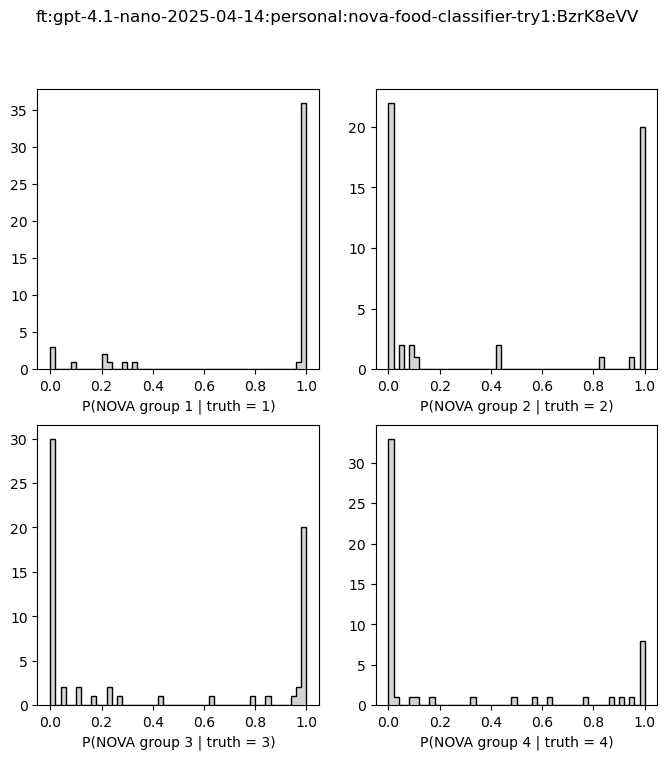

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

ax1.hist(results.query("truth == 1")["P1"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightgrey", edgecolor="black")
ax1.set_xlabel("P(NOVA group 1 | truth = 1)")

ax2.hist(results.query("truth == 2")["P2"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightgrey", edgecolor="black")
ax2.set_xlabel("P(NOVA group 2 | truth = 2)")

ax3.hist(results.query("truth == 3")["P3"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightgrey", edgecolor="black")
ax3.set_xlabel("P(NOVA group 3 | truth = 3)")

ax4.hist(results.query("truth == 4")["P4"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightgrey", edgecolor="black")
ax4.set_xlabel("P(NOVA group 4 | truth = 4)")

fig.suptitle("ft:gpt-4.1-nano-2025-04-14:personal:nova-food-classifier-try1:BzrK8eVV")

None